[  2.12520017e+05   7.67331215e+05  -3.86423903e+06   5.98730138e+06
  -4.66900243e+06   2.07289939e+06  -5.38154459e+05   7.70116043e+04
  -4.50563601e+03  -1.12395752e+02   5.37584799e+00   2.84406686e+00
  -1.43491445e-01   8.21077032e-03  -1.25736732e-03  -1.85402701e-04
   2.33838345e-05   2.04706013e-07  -3.92206311e-07   2.75992781e-08
   5.93512238e-09  -2.46954952e-10  -4.76826576e-11   4.07746997e-12
  -5.55420479e-13  -2.00736383e-14   2.31006084e-15   2.84512578e-16
   7.44843346e-17   1.33228372e-19  -9.09035865e-19   4.48643091e-21
  -1.61570793e-21   1.27889015e-23  -6.08868381e-24   3.55470566e-24
   4.49441410e-25  -4.79615841e-26   4.70763091e-27  -4.07479487e-28
  -4.48093737e-29   2.79781032e-30   1.44179257e-31  -3.34119331e-32
   3.01337724e-33   6.12557501e-34  -9.22121461e-35   5.54681824e-36
  -4.11516942e-37   1.74620667e-38]


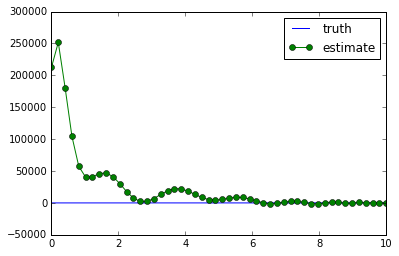

In [29]:
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

def translate_matrix(matrix):
    row_length, column_length = len(matrix), len(matrix[0])
    return [[matrix[row][column] for row in range(len(matrix))] for column in range(len(matrix[0]))]
def reduce_matrix_rows(matrix):
    return [sum(matrix[column]) for column in range(len(matrix))]
def scale_columns(matrix, scales): # assumes length of scales (list) is same as length of a row in matrix
    translated = translate_matrix(matrix)
    scaled = [scalar_mult(translated[i], scales[i]) for i in range(len(translated))]
    return translate_matrix(scaled)
def scale_rows(matrix, scales):
    return [scalar_mult(matrix[i], scales[i]) for i in range(len(matrix))]
def scalar_mult(row, scale):
    return [scale * elt for elt in row]


def pinv(A):
    translated = translate_matrix(A)
    # A.T, A.dot(x)
    return np.dot(np.linalg.inv(np.dot(translated, A)), translated)
def regress_polynomial(degree, x, y):
    A = np.array([[ex**i for i in range(degree + 1)] for ex in x])
    Alpha = pinv(A)
    coefficients = np.dot(Alpha, y)
    #print(coefficients)
    print(coefficients)
    def polynomial(x):
        result = 0
        for deg in range(degree + 1):
            result += coefficients[deg] * (x**deg)
        return result
    return polynomial

x = [n for n in range(12)]
x = np.arange(12)
x = np.linspace(0, 10)
y = [2, 5, 9, 19, 36, 41, 88, 189, 220, 500, 1060, 2370]
y = x + np.random.randn(*x.shape)
regress = regress_polynomial(49, x, y)
xi = np.arange(x[0], x[-1] + 1)
xi = x.copy()
yi = [regress(x) for x in xi]
plot.figure()
plot.plot(x, y, label='truth')
plot.plot(xi, yi, 'o-', label='estimate')
plot.legend(loc='best')
plot.show()

In [31]:
import numpy as np
a = np.array([[1,2],[3,3],[4,2]])
y = np.array([3,4,2])
np.linalg.pinv(a)@y


array([-0.33333333,  1.66666667])